In [ ]:
!pip install -r "/content/drive/MyDrive/Colab Notebooks/LEVX_1km/requirements.txt"

In [ ]:
!pip install lazypredict

In [4]:
import plotly.express as px
import pandas as pd
import numpy as np
coor=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/input_files/distan_lat42.22lon-8.63p2R1Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="Nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

In [6]:
import pandas as pd
station = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/input_files/LEVX_20192020.csv",
                          usecols = ["time","dir_o"],
                          parse_dates=["time"]).set_index("time")
station["dir_o"].describe()

count    41350.000000
mean       160.983990
std        115.183827
min         -1.000000
25%         20.000000
50%        200.000000
75%        240.000000
max        360.000000
Name: dir_o, dtype: float64

In [15]:
#visibility to interval
interval = pd.IntervalIndex.from_tuples([(-1.5, -0.5),(-0.5,20), (20, 40), (40, 60),
                                           (60,80),(80,100),(100,120),(120,140),(140,160),
                                           (160,180),(180,200),(200,220),(220,240),
                                           (240,260),(260,280),(280,300),(300,320),
                                           (320,340),(340,360)])
labels = ['VRB', '[0.0, 20.0]', '(20.0, 40.0]', '(40.0, 60.0]',
        '(60.0, 80.0]', '(80.0, 100.0]', '(100.0, 120.0]', '(120.0, 140.0]',
        '(140.0, 160.0]', '(160.0, 180.0]', '(180.0, 200.0]', '(200.0, 220.0]',
        '(220.0, 240.0]', '(240.0, 260.0]', '(260.0, 280.0]', '(280.0, 300.0]',
        '(300.0, 320.0]', '(320.0, 340.0]', '(340.0, 360.0]']

station["dir_l"] = pd.cut(station["dir_o"], bins=interval,retbins=False,
                        labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)

station["dir_l"].value_counts(normalize= True)

VRB               0.180459
(180.0, 200.0]    0.148198
(200.0, 220.0]    0.103748
(220.0, 240.0]    0.084450
[0.0, 20.0]       0.083096
(260.0, 280.0]    0.075139
(240.0, 260.0]    0.068779
(160.0, 180.0]    0.065659
(20.0, 40.0]      0.044474
(340.0, 360.0]    0.043700
(280.0, 300.0]    0.025780
(40.0, 60.0]      0.020532
(300.0, 320.0]    0.019299
(320.0, 340.0]    0.017074
(60.0, 80.0]      0.006675
(80.0, 100.0]     0.005683
(140.0, 160.0]    0.003313
(100.0, 120.0]    0.002636
(120.0, 140.0]    0.001306
Name: dir_l, dtype: float64

**Forecast D0**

In [16]:
#forecast d0
model1k = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/input_files/lat42.22lon-8.63p2R1KmD0.csv",parse_dates=["time"]).drop(columns=["Unnamed: 0"]).set_index("time")
model1k

,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,lhflx0,...,cape1,cin1,cfh1,cfl1,cfm1,cft1,HGT5001,HGT8501,T5001,T8501
time,,,,,,,,,,,,,,,,,,,,,
2019-01-01 01:00:00,143.268921,0.0,1801.360962,0.789023,1.467980,103158.796875,280.410004,0.823894,24135.000000,6.723936,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5730.042969,1595.621948,253.857193,283.275238
2019-01-01 02:00:00,152.222214,0.0,1766.035156,1.437459,2.645142,103178.460938,279.987000,0.822755,24135.000000,6.389383,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5729.319824,1597.058472,253.848557,282.842499
2019-01-01 03:00:00,154.053619,0.0,1728.199341,1.304144,2.414089,103142.132812,279.750885,0.820316,24135.000000,6.182112,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5724.619141,1593.626953,253.876816,282.377808
2019-01-01 04:00:00,162.321548,0.0,1716.658325,1.242218,2.291945,103172.617188,279.614197,0.806320,24135.000000,6.556708,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5725.305664,1596.243408,253.810440,282.195923
2019-01-01 05:00:00,167.243256,0.0,1718.675293,0.790160,1.460847,103175.796875,279.555634,0.787751,24135.000000,7.131637,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5724.179199,1596.257935,253.821121,282.136566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,316.116913,0.0,800.844543,5.403949,10.236845,101375.132812,279.880554,0.861849,24050.560547,28.912556,...,22.750000,-12.612812,0.0,0.000000,0.0,0.000000,5360.758301,1434.292603,243.570251,271.706177
2020-12-31 20:00:00,318.488983,0.0,708.539551,4.331174,8.753118,101517.437500,279.643799,0.881646,24048.224609,21.361237,...,34.250000,-4.223125,0.0,0.300000,0.1,0.300000,5362.556641,1437.166504,242.893250,271.008636
2020-12-31 21:00:00,314.300262,0.0,763.025513,3.515929,6.365382,101593.578125,279.461945,0.917659,24056.218750,13.615123,...,30.620001,-5.149188,0.0,0.070246,0.0,0.070246,5366.014160,1441.580811,242.227005,271.706116


In [17]:
#concat station model
df_all1k = pd.concat([station,model1k],axis=1).dropna()
df_all1k

,dir_o,dir_l,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,...,cape1,cin1,cfh1,cfl1,cfm1,cft1,HGT5001,HGT8501,T5001,T8501
time,,,,,,,,,,,,,,,,,,,,,
2019-01-01 01:00:00,230.0,"(220.0, 240.0]",143.268921,0.0,1801.360962,0.789023,1.467980,103158.796875,280.410004,0.823894,...,0.0,0.000000,0.0,0.0,0.0,0.0,5730.042969,1595.621948,253.857193,283.275238
2019-01-01 02:00:00,230.0,"(220.0, 240.0]",152.222214,0.0,1766.035156,1.437459,2.645142,103178.460938,279.987000,0.822755,...,0.0,0.000000,0.0,0.0,0.0,0.0,5729.319824,1597.058472,253.848557,282.842499
2019-01-01 03:00:00,230.0,"(220.0, 240.0]",154.053619,0.0,1728.199341,1.304144,2.414089,103142.132812,279.750885,0.820316,...,0.0,0.000000,0.0,0.0,0.0,0.0,5724.619141,1593.626953,253.876816,282.377808
2019-01-01 04:00:00,240.0,"(220.0, 240.0]",162.321548,0.0,1716.658325,1.242218,2.291945,103172.617188,279.614197,0.806320,...,0.0,0.000000,0.0,0.0,0.0,0.0,5725.305664,1596.243408,253.810440,282.195923
2019-01-01 05:00:00,230.0,"(220.0, 240.0]",167.243256,0.0,1718.675293,0.790160,1.460847,103175.796875,279.555634,0.787751,...,0.0,0.000000,0.0,0.0,0.0,0.0,5724.179199,1596.257935,253.821121,282.136566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24 19:00:00,40.0,"(20.0, 40.0]",9.241409,0.0,1114.372070,4.894399,7.983289,102750.492188,280.356812,0.850322,...,0.0,-0.000438,0.0,0.0,0.0,0.0,5529.350586,1529.656250,248.538376,273.540680
2020-12-24 20:00:00,-1.0,VRB,17.789364,0.0,1115.066650,5.159622,10.980127,102863.531250,280.214874,0.837604,...,0.0,0.000359,0.0,0.0,0.0,0.0,5534.803223,1534.443115,248.254623,273.497437
2020-12-24 21:00:00,60.0,"(40.0, 60.0]",18.492819,0.0,1114.713379,4.304277,9.638730,102951.648438,280.168427,0.838092,...,0.0,-0.000215,0.0,0.0,0.0,0.0,5545.419434,1536.551025,248.680069,273.530487


In [18]:
#label meteorological model prec points 0 to 9
df_all1k["dir0_l"] = pd.cut(df_all1k["dir0"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
df_all1k["dir1_l"] = pd.cut(df_all1k["dir1"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
df_all1k = df_all1k.drop(columns=["dir_o"])
df_all1k[["dir_l","dir0_l","dir1_l"]].sample(20)

,dir_l,dir0_l,dir1_l
time,,,
2020-07-24 10:00:00,"(40.0, 60.0]","[0.0, 20.0]","[0.0, 20.0]"
2020-03-24 11:00:00,"(220.0, 240.0]","(160.0, 180.0]","(160.0, 180.0]"
2019-10-28 07:00:00,"(180.0, 200.0]","(140.0, 160.0]","(160.0, 180.0]"
2019-10-04 21:00:00,"(320.0, 340.0]","(280.0, 300.0]","(280.0, 300.0]"
2020-09-13 10:00:00,VRB,"(160.0, 180.0]","(180.0, 200.0]"
2020-07-14 19:00:00,"[0.0, 20.0]","(340.0, 360.0]","[0.0, 20.0]"
2019-02-26 13:00:00,"(200.0, 220.0]","(160.0, 180.0]","(160.0, 180.0]"
2019-02-27 22:00:00,"(200.0, 220.0]","(220.0, 240.0]","(220.0, 240.0]"
2020-02-29 13:00:00,"(220.0, 240.0]","(260.0, 280.0]","(240.0, 260.0]"


**meteorological model score point 0**

****

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



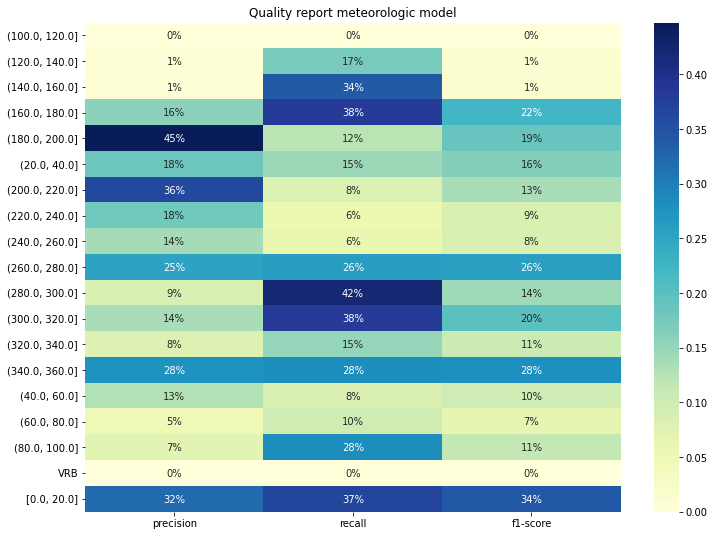

In [19]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 9))
plt.title("Quality report meteorologic model")
cr=pd.DataFrame(classification_report(df_all1k.dir_l, df_all1k.dir0_l,output_dict=True)).T
sns.heatmap(cr[:-3].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.0%');

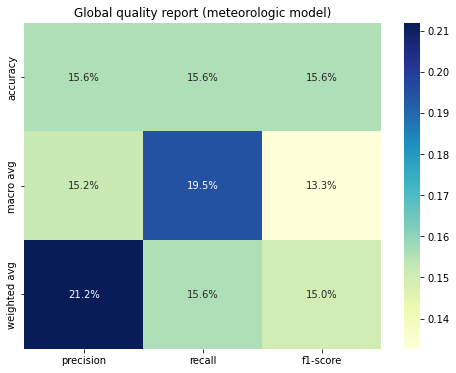

In [20]:
plt.figure(figsize=(8, 6))
plt.title("Global quality report (meteorologic model)")
sns.heatmap(cr[-3:].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.1%');

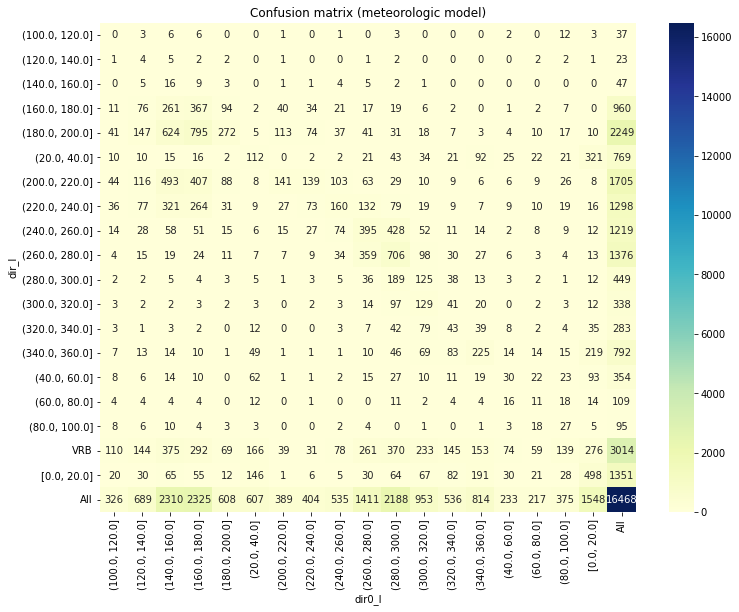

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 9))
plt.title("Confusion matrix (meteorologic model)")

global_sc = pd.crosstab(df_all1k.dir_l, df_all1k.dir0_l,margins=True,)
sns.heatmap(global_sc,annot=True,cmap="YlGnBu",fmt='.0f');

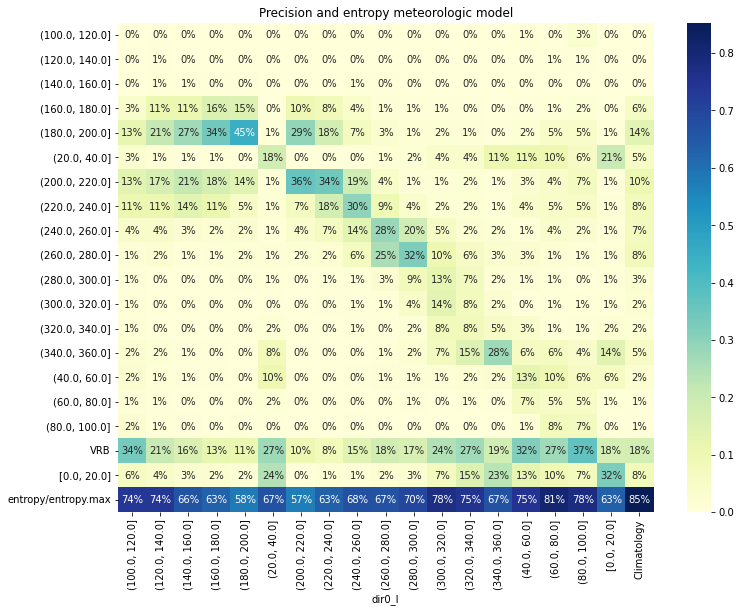

In [22]:
import math
from scipy.stats import entropy


plt.figure(figsize=(12, 9))
plt.title("Precision and entropy meteorologic model")
column_sc = pd.crosstab(df_all1k.dir_l, df_all1k.dir0_l, margins=True,normalize="columns")
column_sc = column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropy/entropy.max"],
                    index=column_sc.columns).T).rename(columns={"All":"Climatology"})
sns.heatmap(column_sc,annot=True,cmap="YlGnBu",fmt='.0%');

In [24]:
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyClassifier

# X and Y
Y = df_all1k.dir_l
X = df_all1k.iloc[:,1:]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )


multiple_model = LazyClassifier(verbose =0, ignore_warnings = True,predictions=True)
models,predictions = multiple_model.fit(X_train,X_test,y_train,y_test)

100%|██████████| 29/29 [08:33<00:00, 17.70s/it]


In [25]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.40,0.25,None,0.39,4.04
RandomForestClassifier,0.41,0.25,None,0.39,9.39
BaggingClassifier,0.36,0.24,None,0.35,6.17
XGBClassifier,0.40,0.24,None,0.38,72.13
LabelSpreading,0.33,0.24,None,0.33,18.11
LabelPropagation,0.33,0.24,None,0.33,8.90
LGBMClassifier,0.39,0.24,None,0.38,18.95
KNeighborsClassifier,0.33,0.22,None,0.33,1.68
LinearDiscriminantAnalysis,0.33,0.21,None,0.31,0.47



Matriz de Confusión  (Machine Learning)


Informe de calidad desagregado (Machine Learning)

                precision  recall  f1-score  support
(100.0, 120.0]       0.00    0.00      0.00     3.00
(120.0, 140.0]       0.00    0.00      0.00     4.00
(140.0, 160.0]       0.00    0.00      0.00     6.00
(160.0, 180.0]       0.48    0.28      0.35   152.00
(180.0, 200.0]       0.53    0.62      0.57   363.00
(20.0, 40.0]         0.36    0.24      0.29   113.00
(200.0, 220.0]       0.42    0.39      0.40   248.00
(220.0, 240.0]       0.41    0.31      0.36   207.00
(240.0, 260.0]       0.40    0.29      0.33   187.00
(260.0, 280.0]       0.39    0.46      0.42   199.00
(280.0, 300.0]       0.26    0.13      0.17    69.00
(300.0, 320.0]       0.37    0.20      0.26    55.00
(320.0, 340.0]       0.33    0.07      0.12    41.00
(340.0, 360.0]       0.43    0.30      0.36   115.00
(40.0, 60.0]         0.23    0.10      0.14    50.00
(60.0, 80.0]         0.25    0.07      0.11    14.00
(80.0

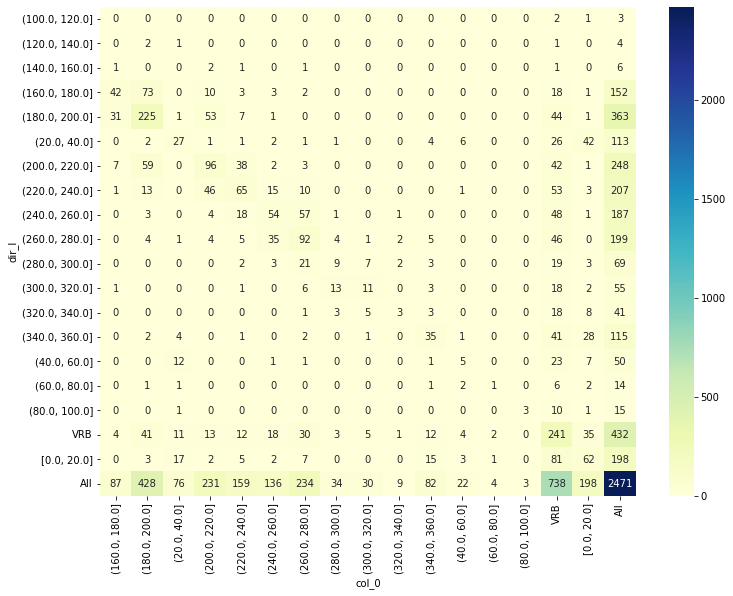

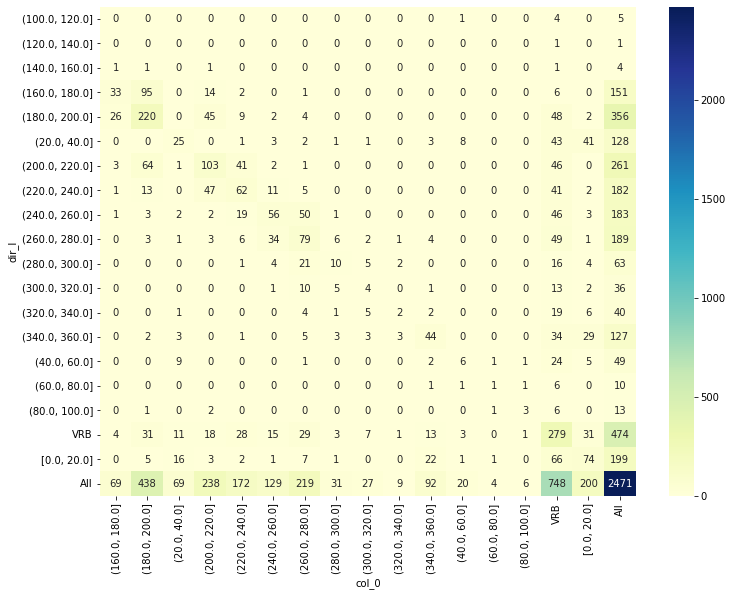

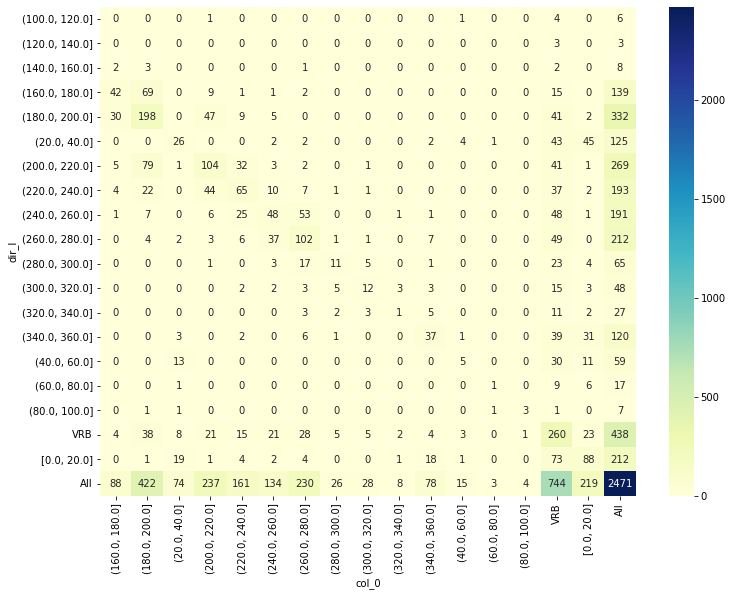

In [31]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

#select x variables
x_var = df_all1k.drop(columns=["dir_l","dir0_l","dir1_l"]).columns.to_list()  

# X and Y
Y = df_all1k.dir_l
X = df_all1k[x_var]

# loop ranadom

for t in range (0,3):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, )

  # Resample
  #X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  ml_model = LGBMClassifier(n_estimators=250).fit(X_train,y_train)

  #Confussion matrix

  print("\nMatriz de Confusión  (Machine Learning)\n")

  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  plt.figure(figsize=(12, 9))
  sns.heatmap(cm,annot=True,cmap="YlGnBu",fmt='.0f');

  #quality report

  print("\nInforme de calidad desagregado (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

In [32]:
df_all1k["hour"] = df_all1k.index.hour
df_all1k["month"] = df_all1k.index.month
df_all1k["dayofyear"] = df_all1k.index.dayofyear
df_all1k["weekofyear"] = df_all1k.index.weekofyear


Matriz de Confusión  (Machine Learning)


Informe de calidad desagregado (Machine Learning)

                precision  recall  f1-score  support
(100.0, 120.0]       0.00    0.00      0.00     9.00
(120.0, 140.0]       0.00    0.00      0.00     4.00
(140.0, 160.0]       0.00    0.00      0.00    10.00
(160.0, 180.0]       0.54    0.28      0.37   165.00
(180.0, 200.0]       0.48    0.62      0.54   336.00
(20.0, 40.0]         0.37    0.21      0.26   121.00
(200.0, 220.0]       0.45    0.39      0.42   259.00
(220.0, 240.0]       0.41    0.38      0.39   197.00
(240.0, 260.0]       0.35    0.29      0.32   179.00
(260.0, 280.0]       0.40    0.47      0.43   198.00
(280.0, 300.0]       0.29    0.17      0.21    48.00
(300.0, 320.0]       0.43    0.21      0.28    58.00
(320.0, 340.0]       0.18    0.04      0.07    47.00
(340.0, 360.0]       0.37    0.33      0.35   106.00
(40.0, 60.0]         0.22    0.16      0.18    45.00
(60.0, 80.0]         0.00    0.00      0.00    16.00
(80.0

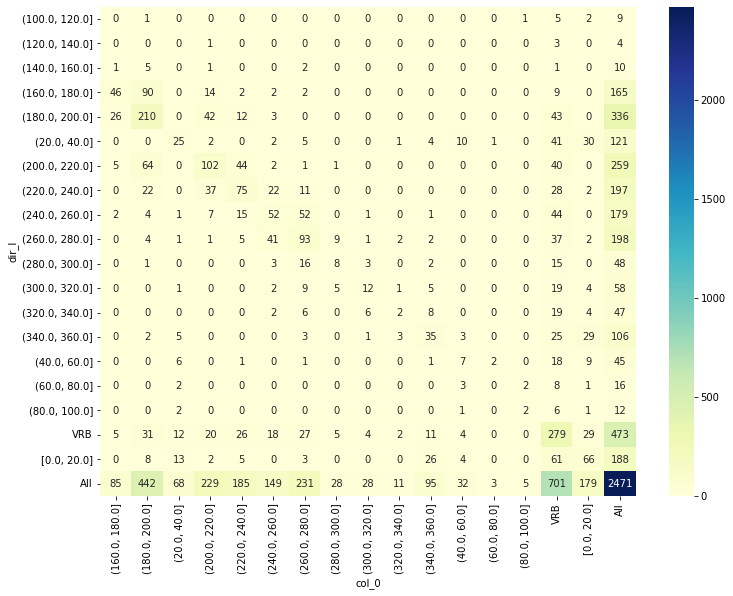

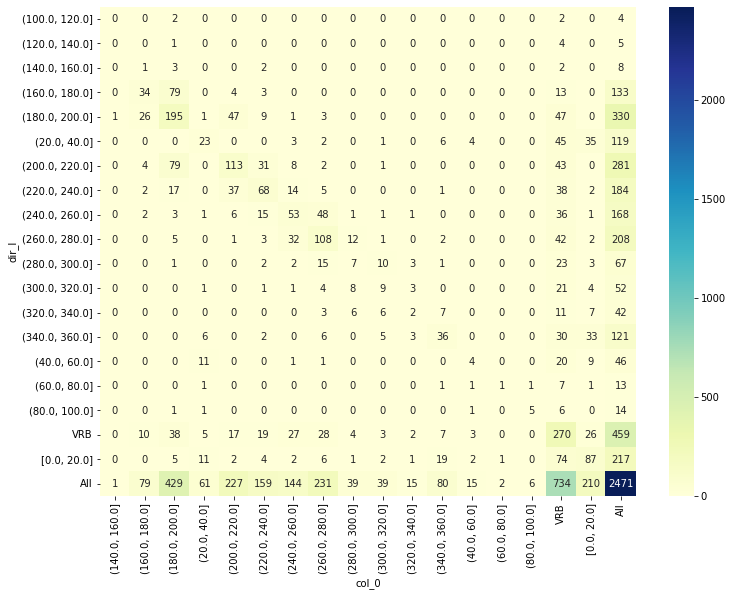

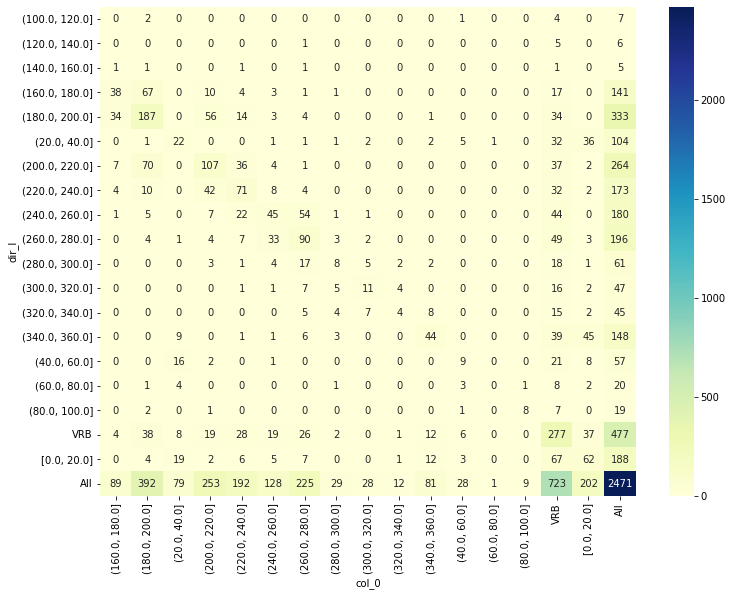

In [35]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


# X and Y
Y = df_all1k.dir_l
X = df_all1k.iloc[:,1:].drop(columns=["dir0_l","dir1_l"])

# loop ranadom

for t in range (0,3):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, )

  ml_model = LGBMClassifier(n_estimators=250).fit(X_train,y_train)

  #Confussion matrix

  print("\nMatriz de Confusión  (Machine Learning)\n")

  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  plt.figure(figsize=(12, 9))
  sns.heatmap(cm,annot=True,cmap="YlGnBu",fmt='.0f');

  #quality report

  print("\nInforme de calidad desagregado (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

In [36]:
X.columns

Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0', 'lwflx0', 'conv_prec0',
       'prec0', 'swflx0', 'shflx0', 'cape0', 'cin0', 'cfh0', 'cfl0', 'cfm0',
       'cft0', 'HGT5000', 'HGT8500', 'T5000', 'T8500', 'dir1', 'snow_prec1',
       'snowlevel1', 'mod1', 'wind_gust1', 'mslp1', 'temp1', 'rh1',
       'visibility1', 'lhflx1', 'lwflx1', 'conv_prec1', 'prec1', 'swflx1',
       'shflx1', 'cape1', 'cin1', 'cfh1', 'cfl1', 'cfm1', 'cft1', 'HGT5001',
       'HGT8501', 'T5001', 'T8501', 'hour', 'month', 'dayofyear',
       'weekofyear'],
      dtype='object')

In [38]:
import pickle
from sklearn.pipeline import Pipeline

x_var = X.columns
estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)
print(pipe)
al_file={"x_var":x_var,"coor":coor,"pipe":pipe}
pickle.dump(al_file, open("dir_LEVX_1km_time_d0.al", 'wb'))

Pipeline(steps=[('ml_model', LGBMClassifier(n_estimators=250))])
